# Task 1 :- Implement a Machine Learning Model with Supervised Model on Student Performance Dataset

# Step 1 :- Load and Explore the Dataset

## Import the Necessary Libraries

In [59]:
import numpy as np
import pandas as pd

# Data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Data transformation Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

# Machine Learning Model Libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor

# Data Evaluation Libraries
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, classification_report
from sklearn.metrics import mean_squared_error

#Filter Warnings
import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

In [2]:
# Loading the data into dataframe
df = pd.read_csv('student_data.csv')

## Data Understanding 

In [3]:
# Displaying first 5 rows
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
# Displaying the last 5 rows
df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,3,2,3,3,3,5,5,8,9,9


In [5]:
# Number of rows and columns
df.shape

(395, 33)

In [6]:
# Information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [7]:
# Datatypes of variables
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [8]:
# Different columns in the dataset
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

## Data Preprocessing 

In [9]:
# Check for null values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [10]:
# Check for duplicate values
df.duplicated().sum()

0

###### Their are no duplicate and null values

In [11]:
#Converting String to Integer
convert_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
df = pd.get_dummies(df, columns=convert_columns)

## Data Analysis

age
Skew : 0.47
Kurtosis -0.001221778068738022
IQR 2.0


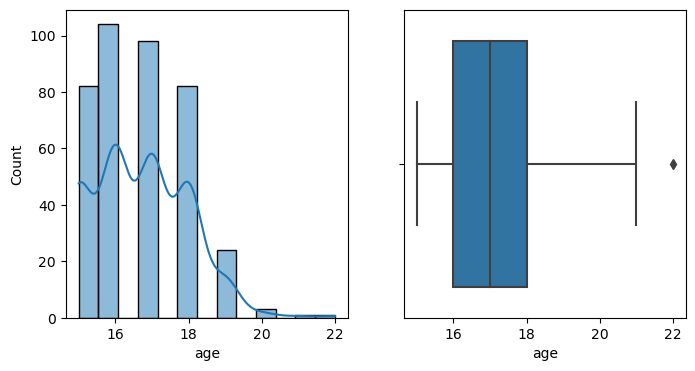

Medu
Skew : -0.32
Kurtosis -1.090014380199599
IQR 2.0


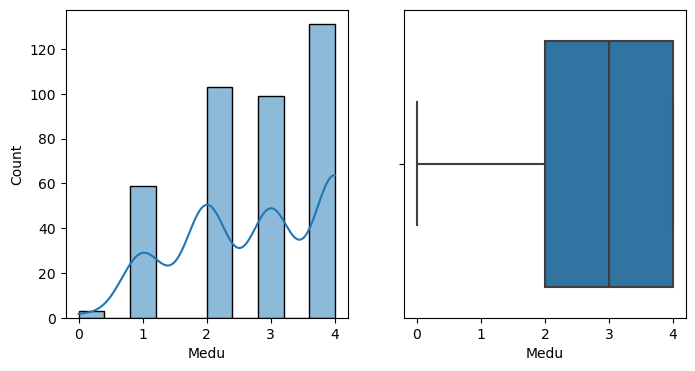

Fedu
Skew : -0.03
Kurtosis -1.1985387615888743
IQR 1.0


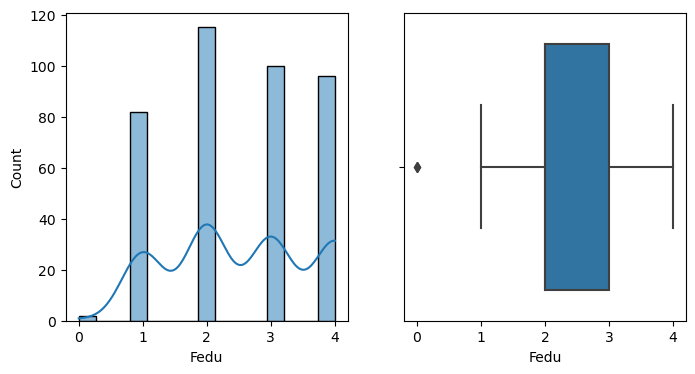

traveltime
Skew : 1.61
Kurtosis 2.344189680881522
IQR 1.0


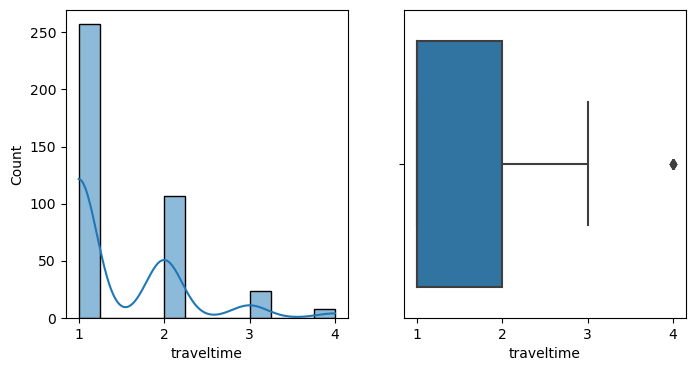

studytime
Skew : 0.63
Kurtosis -0.014431817585421225
IQR 1.0


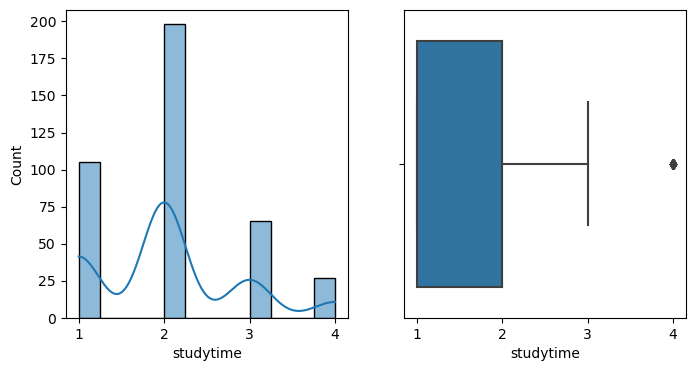

failures
Skew : 2.39
Kurtosis 5.0047266804753
IQR 0.0


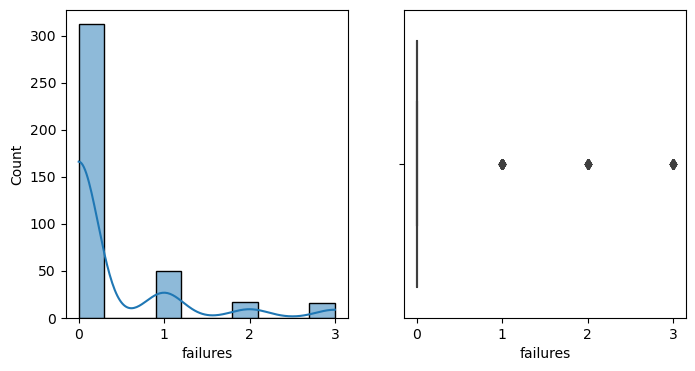

famrel
Skew : -0.95
Kurtosis 1.1397722938283108
IQR 1.0


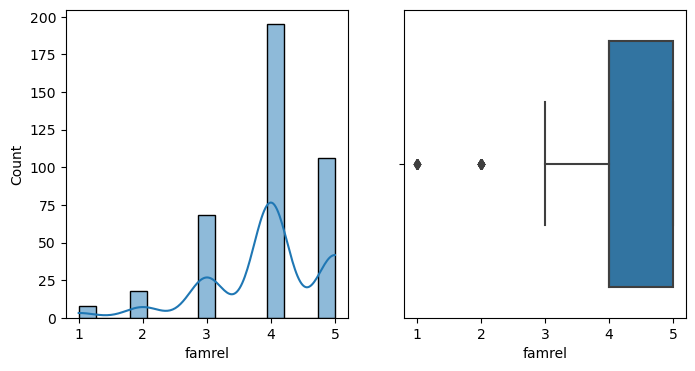

freetime
Skew : -0.16
Kurtosis -0.3018073698229098
IQR 1.0


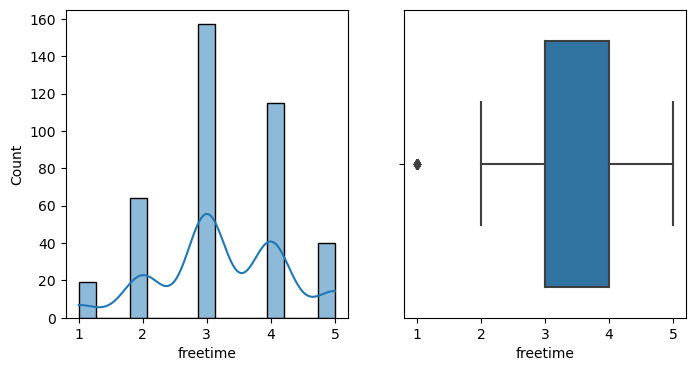

goout
Skew : 0.12
Kurtosis -0.7702502409550558
IQR 2.0


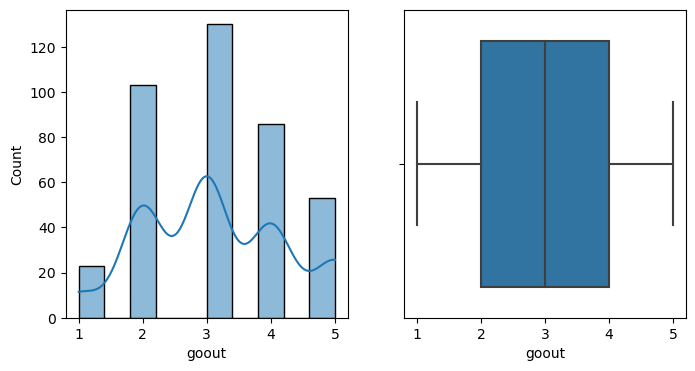

Dalc
Skew : 2.19
Kurtosis 4.759492465474399
IQR 1.0


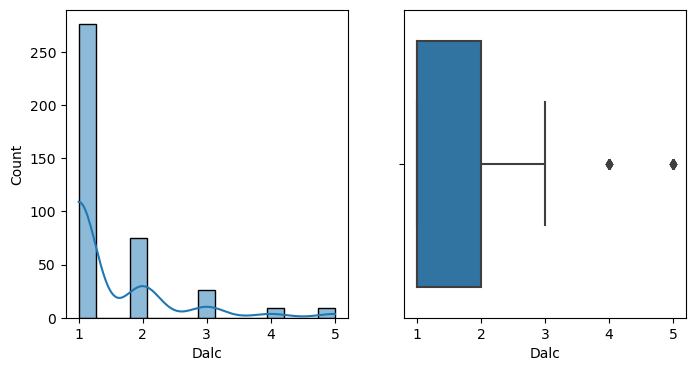

Walc
Skew : 0.61
Kurtosis -0.7908450619068916
IQR 2.0


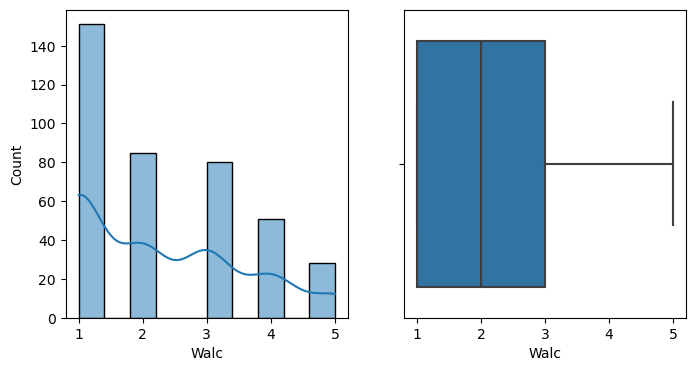

health
Skew : -0.49
Kurtosis -1.014078285547837
IQR 2.0


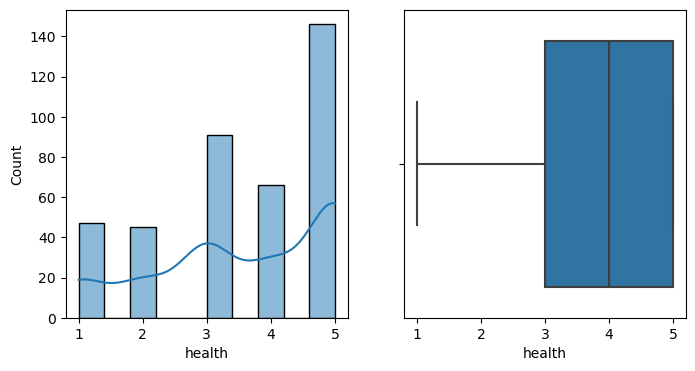

absences
Skew : 3.67
Kurtosis 21.71914971634092
IQR 8.0


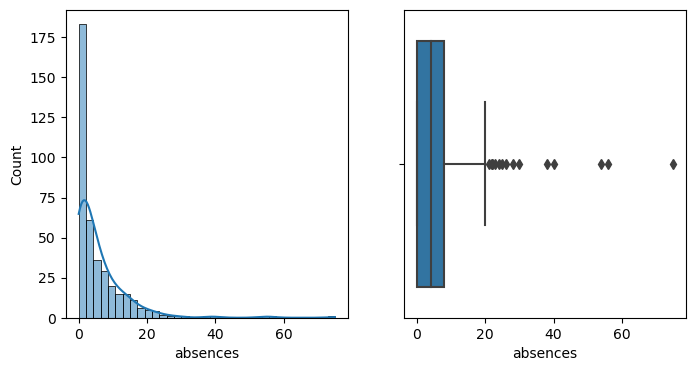

G1
Skew : 0.24
Kurtosis -0.6938295024333452
IQR 5.0


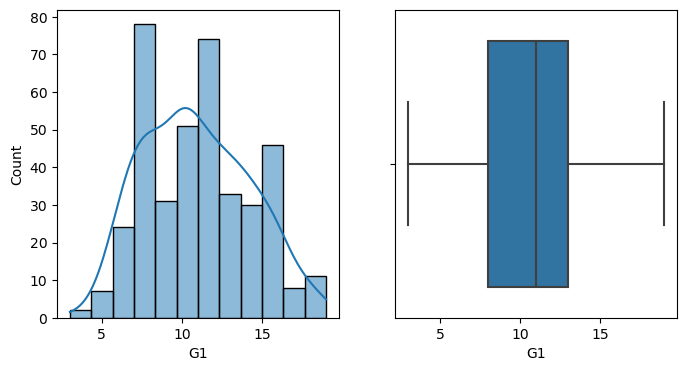

G2
Skew : -0.43
Kurtosis 0.6277056433602413
IQR 4.0


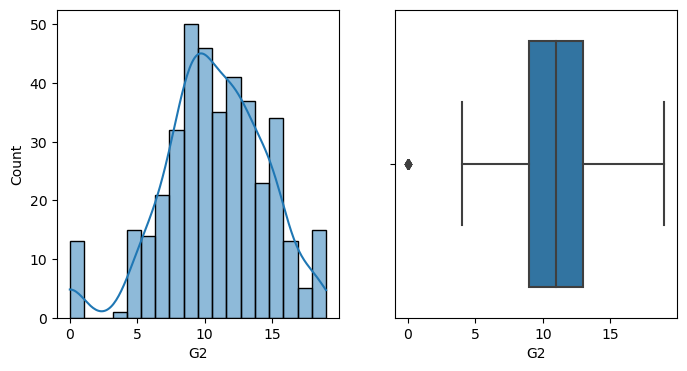

G3
Skew : -0.73
Kurtosis 0.4034208131242458
IQR 6.0


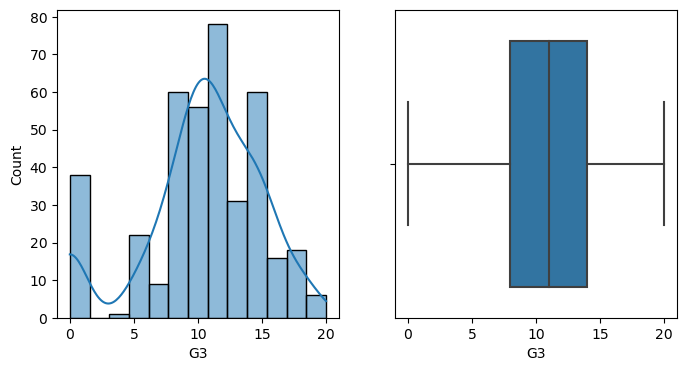

school_GP
Skew : -2.4
Kurtosis 3.7816123504189108
IQR 0.0


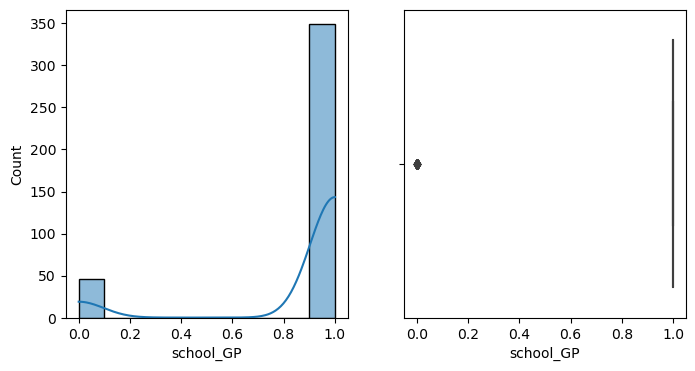

school_MS
Skew : 2.4
Kurtosis 3.781612350418909
IQR 0.0


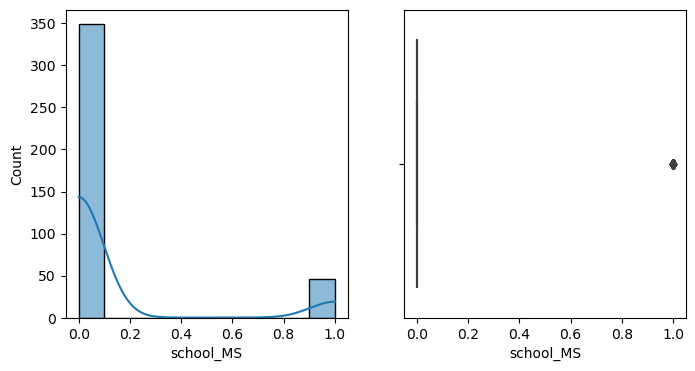

sex_F
Skew : -0.11
Kurtosis -1.9987213176521341
IQR 1.0


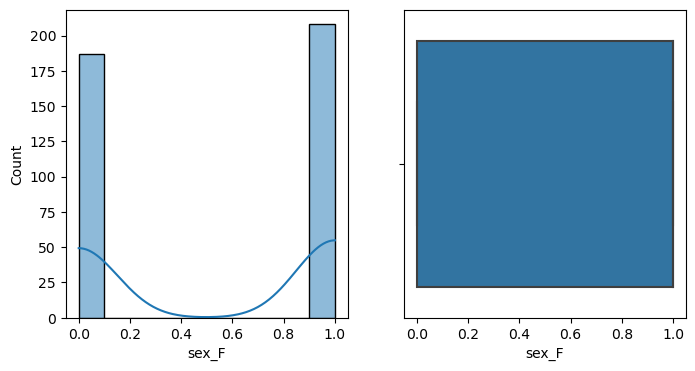

sex_M
Skew : 0.11
Kurtosis -1.998721317652134
IQR 1.0


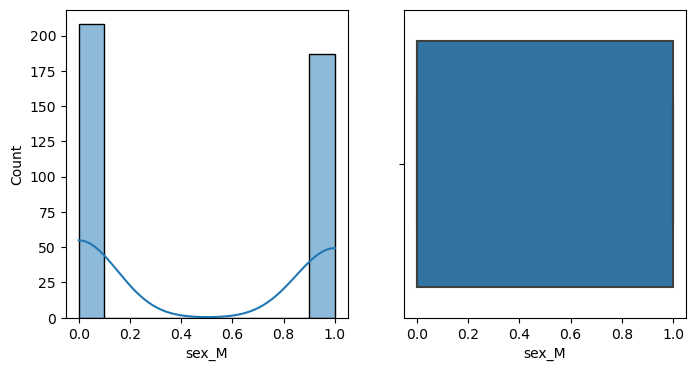

address_R
Skew : 1.34
Kurtosis -0.2122443017040716
IQR 0.0


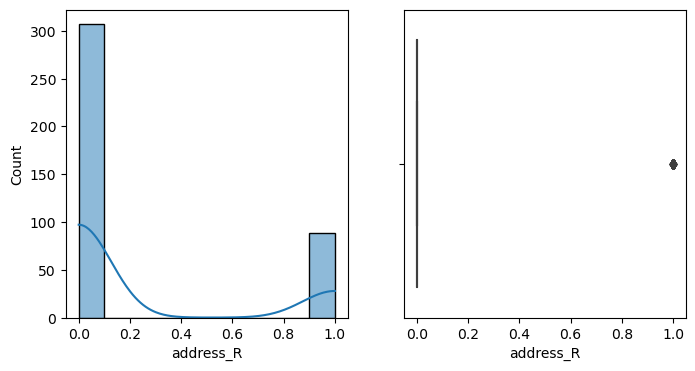

address_U
Skew : -1.34
Kurtosis -0.2122443017040716
IQR 0.0


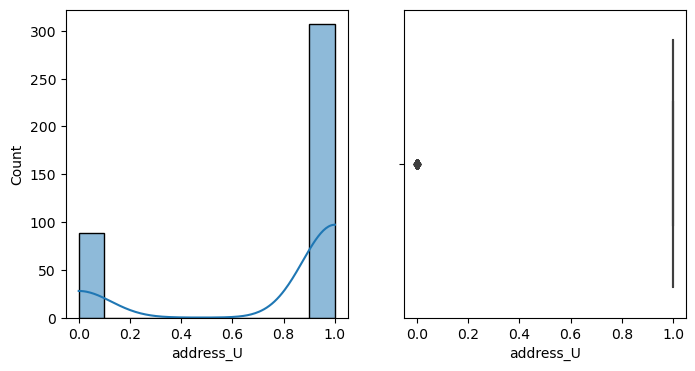

famsize_GT3
Skew : -0.94
Kurtosis -1.1284762257440621
IQR 1.0


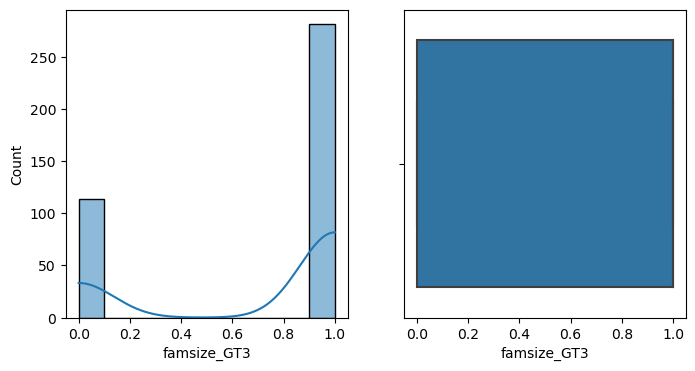

famsize_LE3
Skew : 0.94
Kurtosis -1.1284762257440621
IQR 1.0


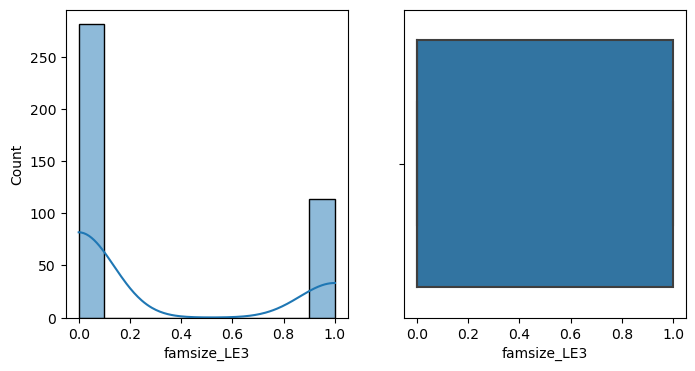

Pstatus_A
Skew : 2.61
Kurtosis 4.825989413276175
IQR 0.0


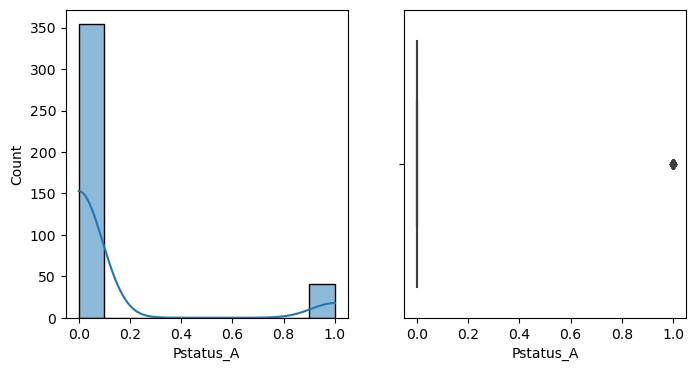

Pstatus_T
Skew : -2.61
Kurtosis 4.825989413276175
IQR 0.0


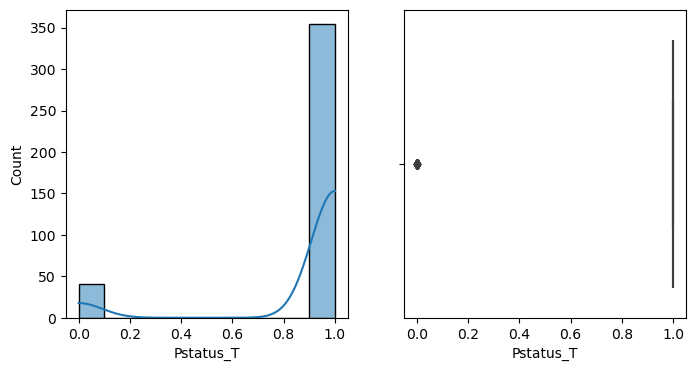

Mjob_at_home
Skew : 1.97
Kurtosis 1.9097505391266179
IQR 0.0


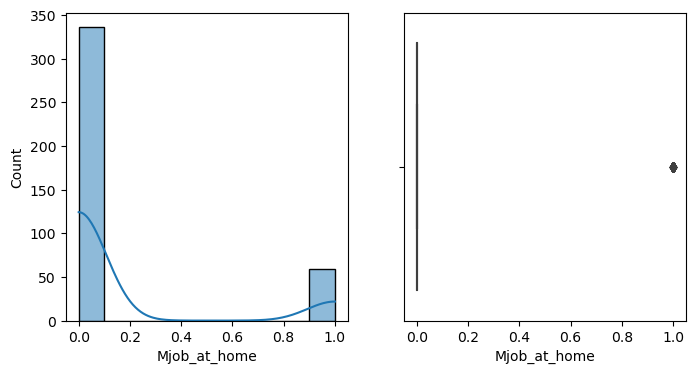

Mjob_health
Skew : 2.96
Kurtosis 6.812915731093351
IQR 0.0


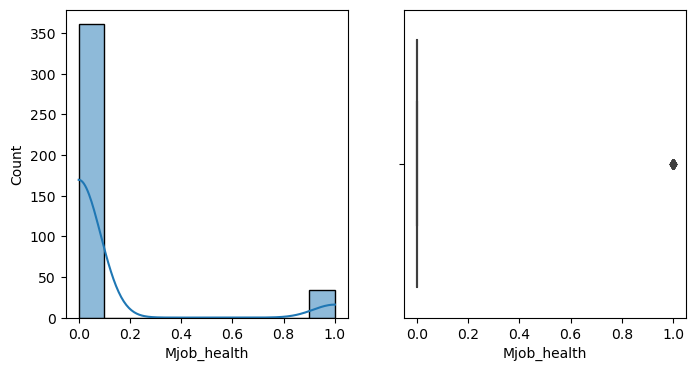

Mjob_other
Skew : 0.6
Kurtosis -1.649112928611713
IQR 1.0


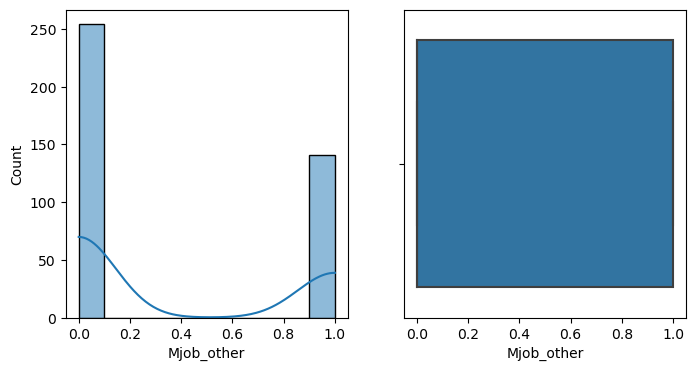

Mjob_services
Skew : 1.09
Kurtosis -0.8073406486400012
IQR 1.0


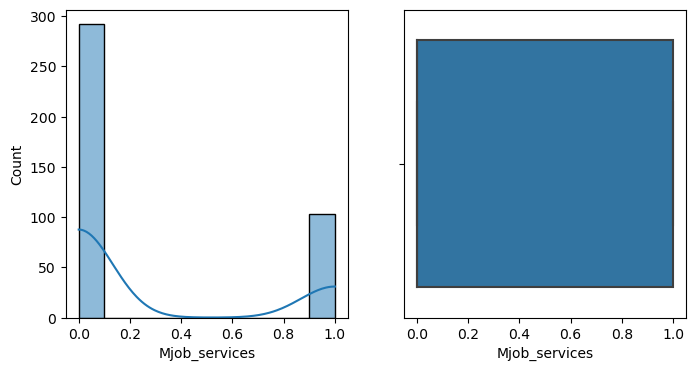

Mjob_teacher
Skew : 2.0
Kurtosis 2.0231217001060378
IQR 0.0


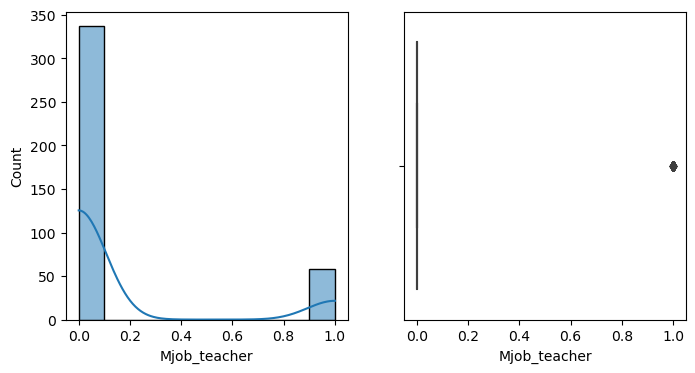

Fjob_at_home
Skew : 4.11
Kurtosis 15.007784701666917
IQR 0.0


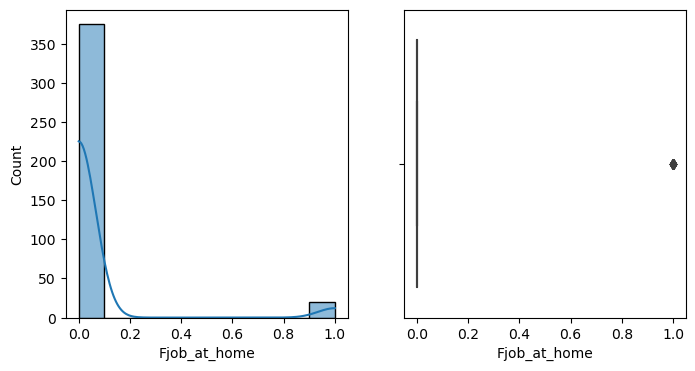

Fjob_health
Skew : 4.37
Kurtosis 17.22460288304685
IQR 0.0


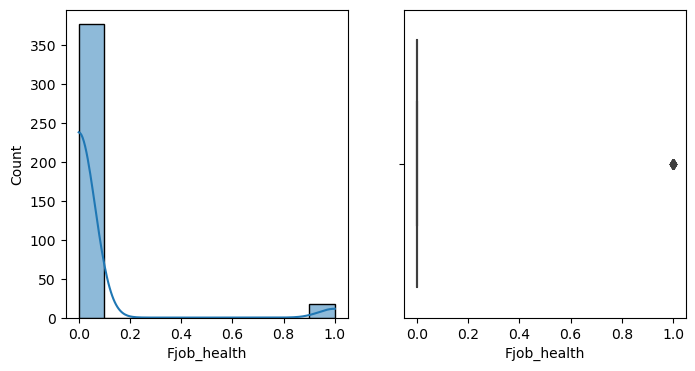

Fjob_other
Skew : -0.2
Kurtosis -1.9703234279459227
IQR 1.0


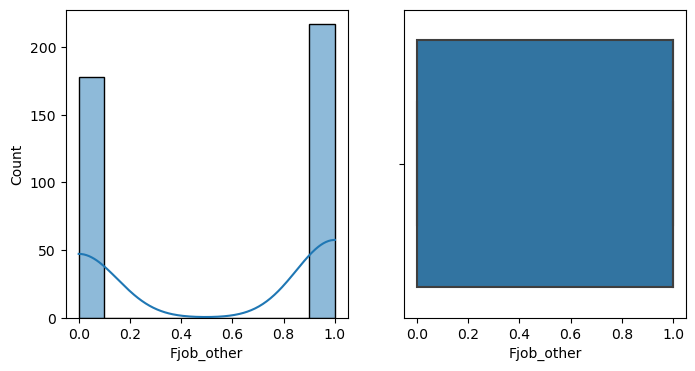

Fjob_services
Skew : 0.98
Kurtosis -1.0486722243330586
IQR 1.0


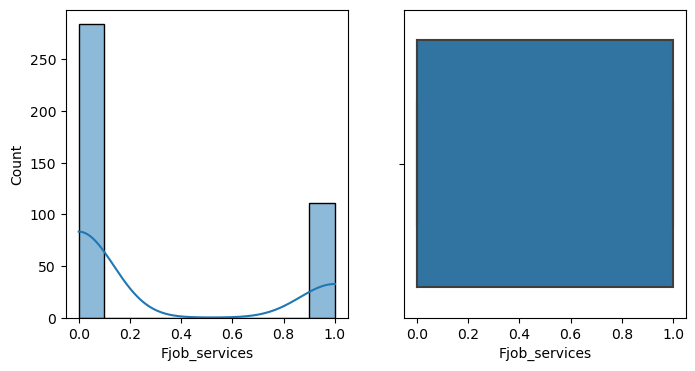

Fjob_teacher
Skew : 3.28
Kurtosis 8.826407540995945
IQR 0.0


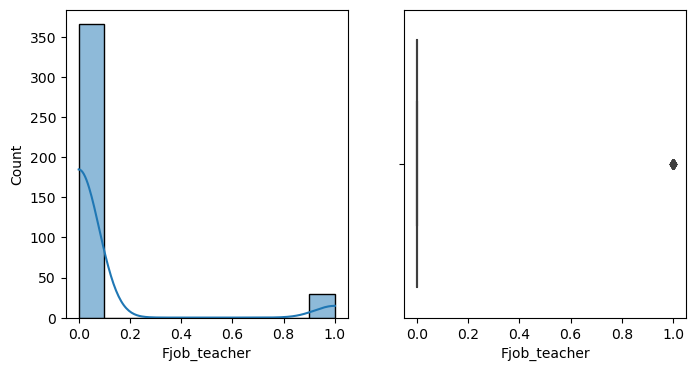

reason_course
Skew : 0.55
Kurtosis -1.7021809176421285
IQR 1.0


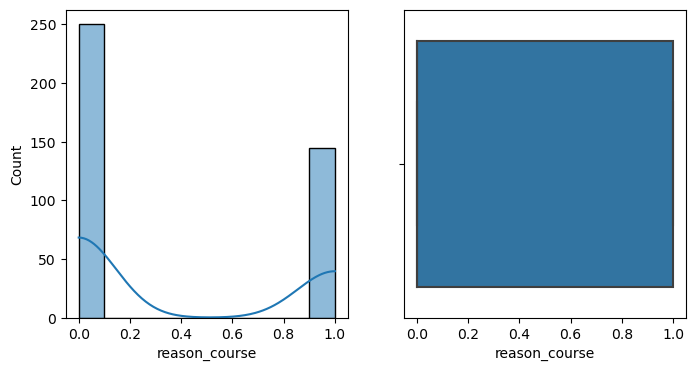

reason_home
Skew : 1.01
Kurtosis -0.9923938976593734
IQR 1.0


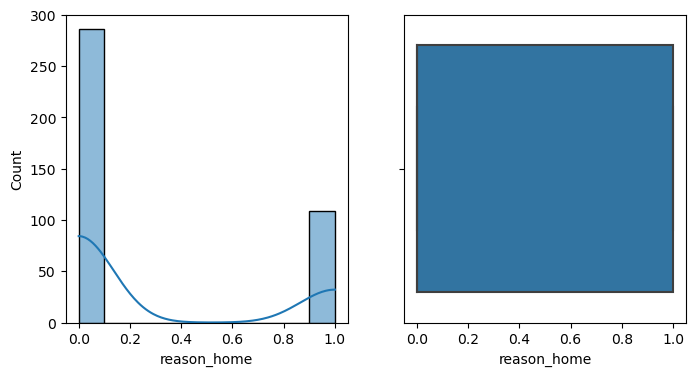

reason_other
Skew : 2.85
Kurtosis 6.16541946256059
IQR 0.0


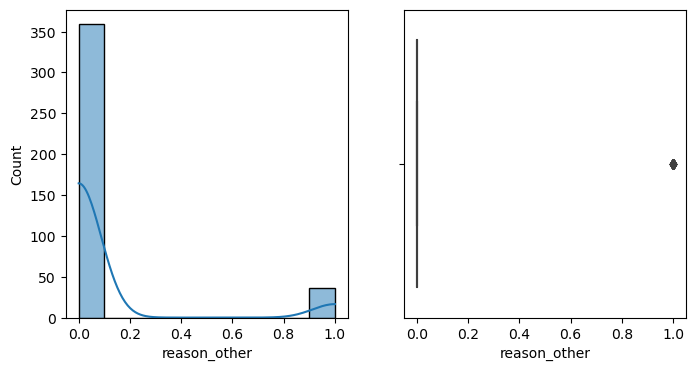

reason_reputation
Skew : 1.06
Kurtosis -0.8718720669932307
IQR 1.0


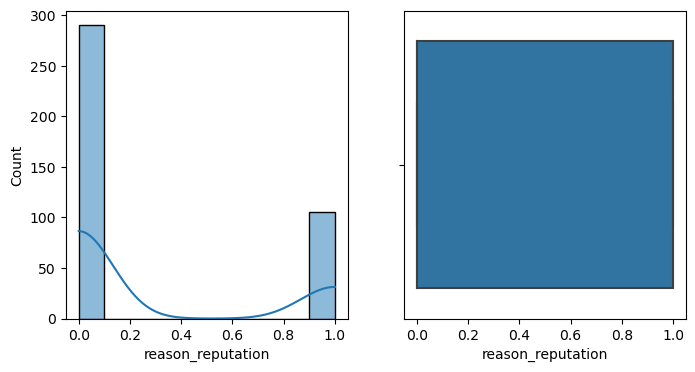

guardian_father
Skew : 1.3
Kurtosis -0.30472121272485886
IQR 0.0


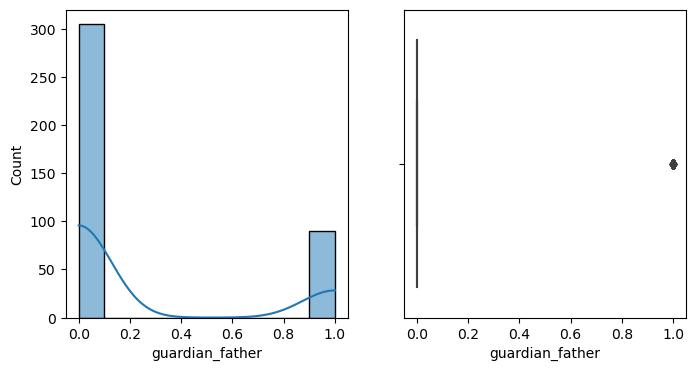

guardian_mother
Skew : -0.83
Kurtosis -1.316867352649954
IQR 1.0


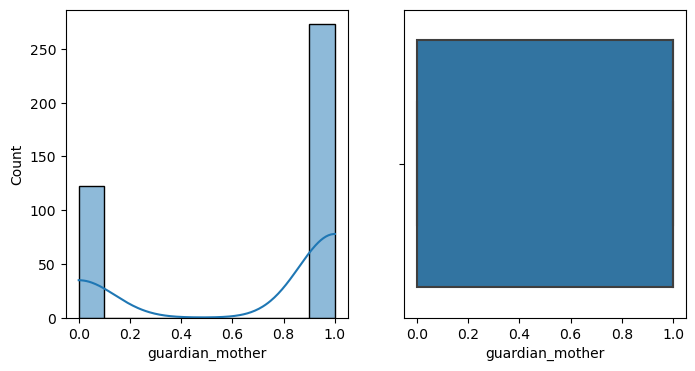

guardian_other
Skew : 3.08
Kurtosis 7.542188761347703
IQR 0.0


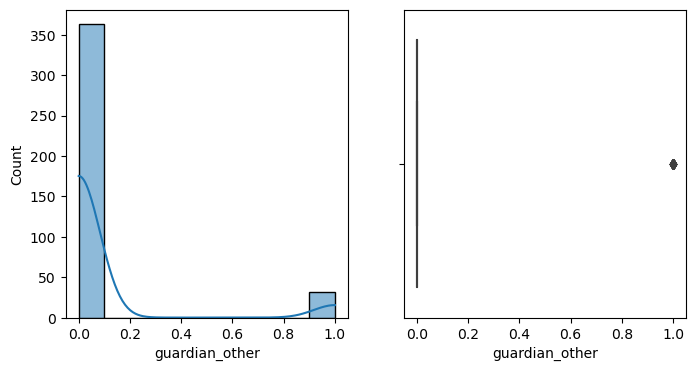

schoolsup_no
Skew : -2.22
Kurtosis 2.945660289679516
IQR 0.0


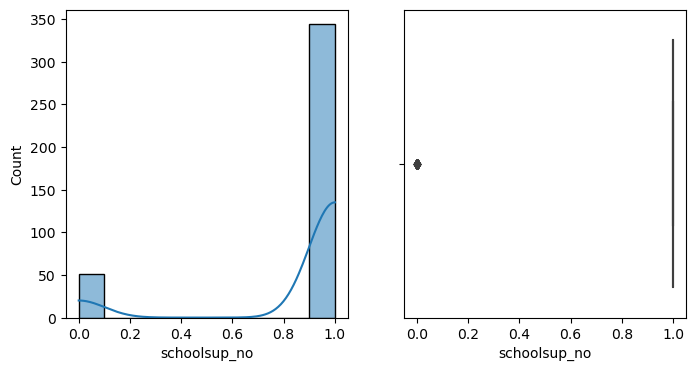

schoolsup_yes
Skew : 2.22
Kurtosis 2.945660289679516
IQR 0.0


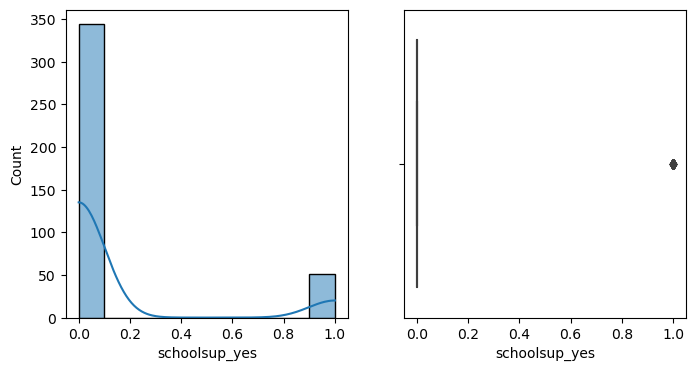

famsup_no
Skew : 0.46
Kurtosis -1.7935404557381591
IQR 1.0


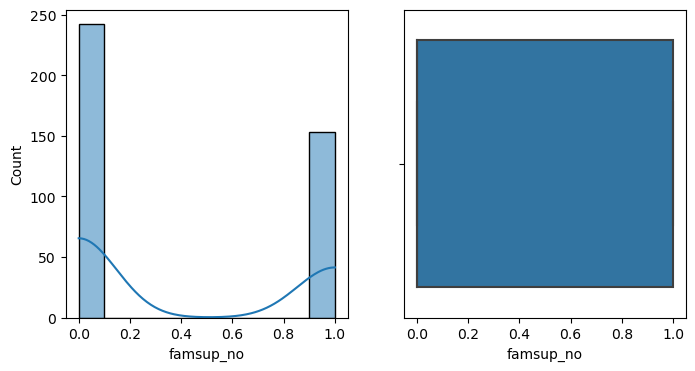

famsup_yes
Skew : -0.46
Kurtosis -1.7935404557381587
IQR 1.0


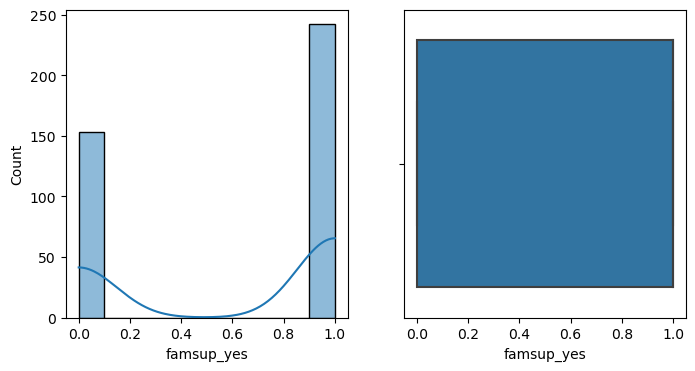

paid_no
Skew : -0.17
Kurtosis -1.9817300920447802
IQR 1.0


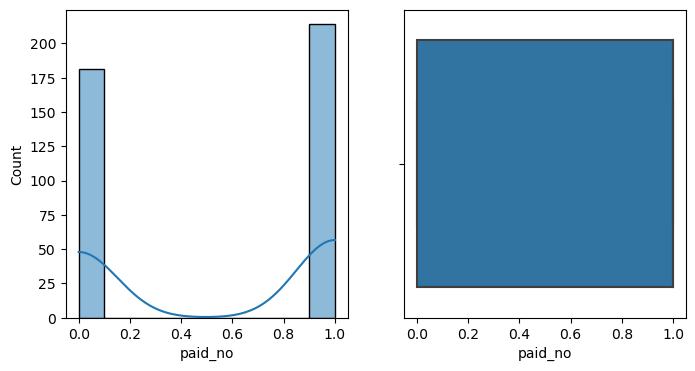

paid_yes
Skew : 0.17
Kurtosis -1.9817300920447802
IQR 1.0


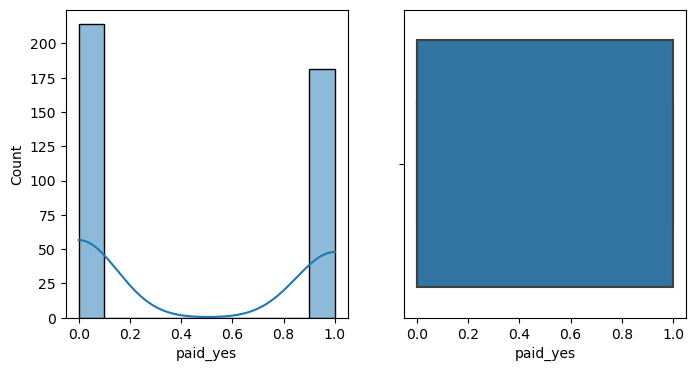

activities_no
Skew : 0.04
Kurtosis -2.008931425475334
IQR 1.0


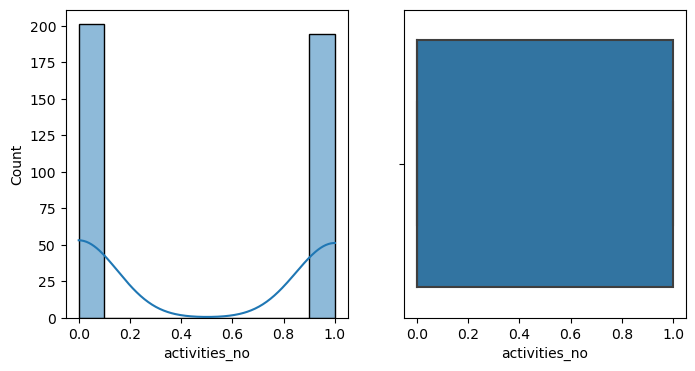

activities_yes
Skew : -0.04
Kurtosis -2.008931425475334
IQR 1.0


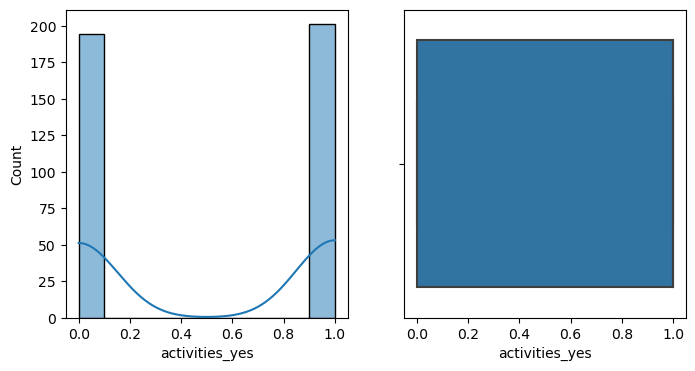

nursery_no
Skew : 1.47
Kurtosis 0.15156830683089728
IQR 0.0


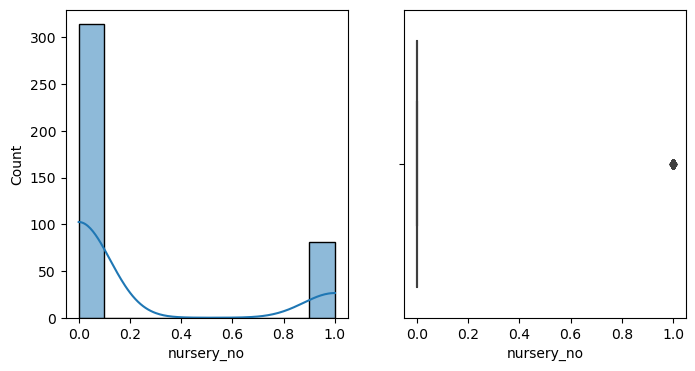

nursery_yes
Skew : -1.47
Kurtosis 0.1515683068309004
IQR 0.0


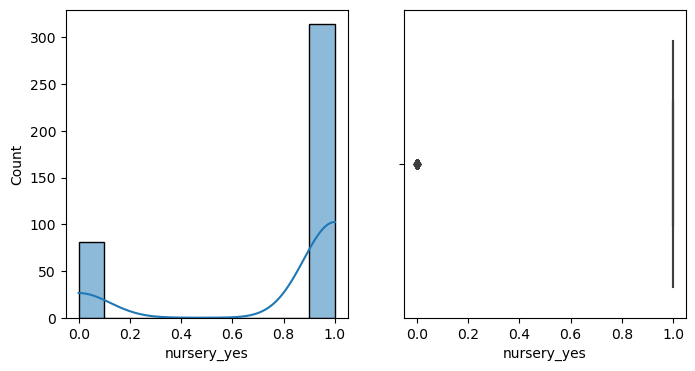

higher_no
Skew : 4.11
Kurtosis 15.007784701666917
IQR 0.0


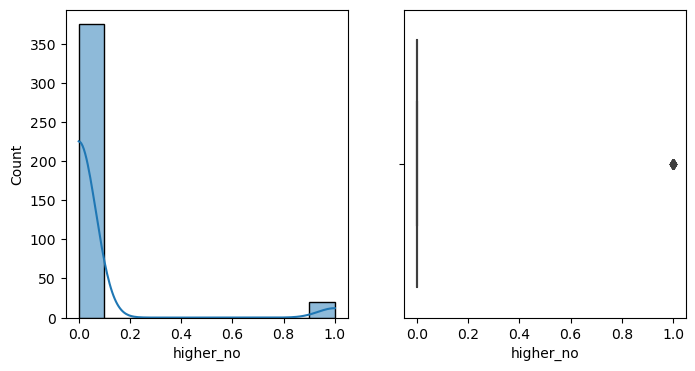

higher_yes
Skew : -4.11
Kurtosis 15.007784701666917
IQR 0.0


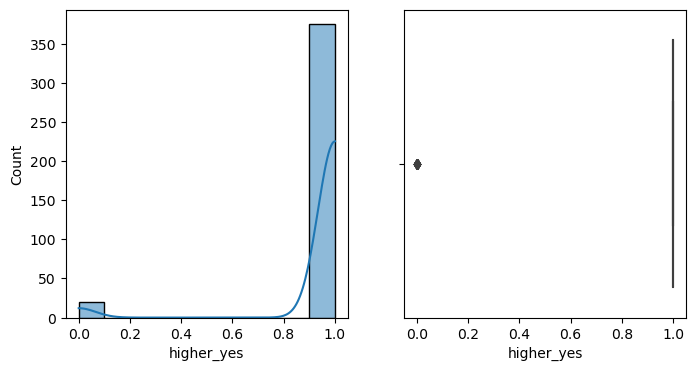

internet_no
Skew : 1.79
Kurtosis 1.2159451590097987
IQR 0.0


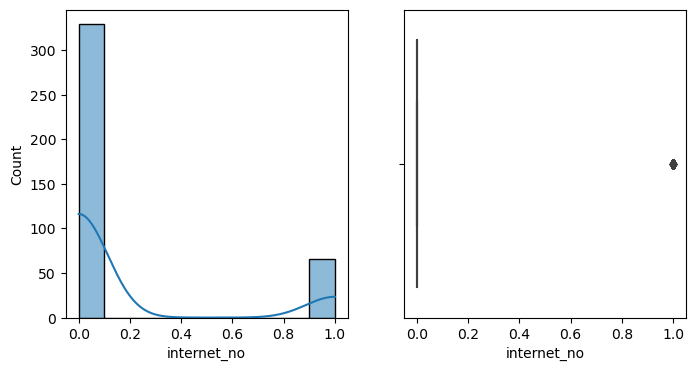

internet_yes
Skew : -1.79
Kurtosis 1.2159451590097987
IQR 0.0


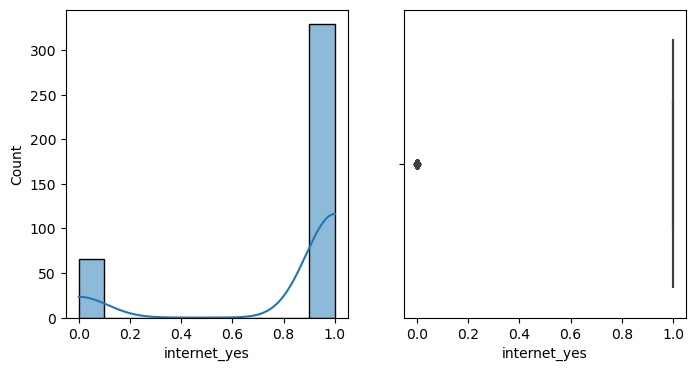

romantic_no
Skew : -0.71
Kurtosis -1.5095639016062696
IQR 1.0


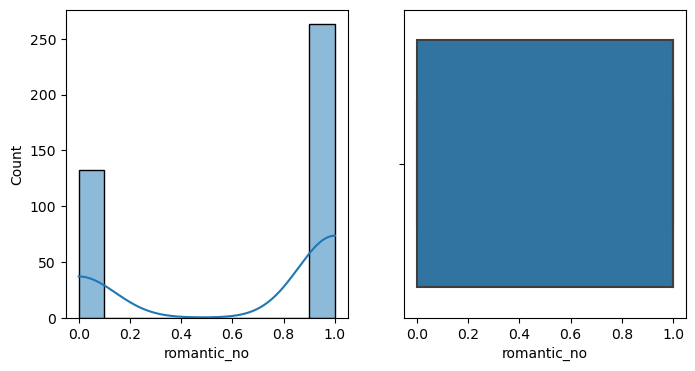

romantic_yes
Skew : 0.71
Kurtosis -1.5095639016062696
IQR 1.0


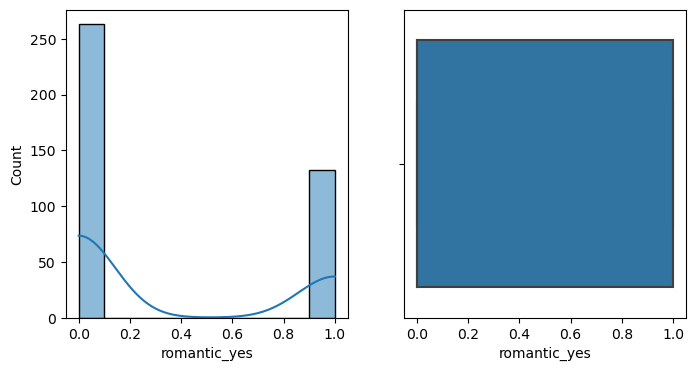

In [12]:
# Check for data distribution and outliers
for col in df.columns:
    print(col)
    print('Skew :', round(df[col].skew(), 2))
    print('Kurtosis', df[col].kurt())
    print('IQR', df[col].quantile(0.75) - df[col].quantile(0.25))
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    sns.histplot(x=df[col], kde='True')
    
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    
    plt.show()

In [13]:
#Check for unique values
df.nunique()

age                   8
Medu                  5
Fedu                  5
traveltime            4
studytime             4
failures              4
famrel                5
freetime              5
goout                 5
Dalc                  5
Walc                  5
health                5
absences             34
G1                   17
G2                   17
G3                   18
school_GP             2
school_MS             2
sex_F                 2
sex_M                 2
address_R             2
address_U             2
famsize_GT3           2
famsize_LE3           2
Pstatus_A             2
Pstatus_T             2
Mjob_at_home          2
Mjob_health           2
Mjob_other            2
Mjob_services         2
Mjob_teacher          2
Fjob_at_home          2
Fjob_health           2
Fjob_other            2
Fjob_services         2
Fjob_teacher          2
reason_course         2
reason_home           2
reason_other          2
reason_reputation     2
guardian_father       2
guardian_mother 

In [14]:
# Descrivtive statistics for numerical values
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,...,0.491139,0.508861,0.205063,0.794937,0.050633,0.949367,0.167089,0.832911,0.665823,0.334177
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,...,0.500555,0.500555,0.404260,0.404260,0.219525,0.219525,0.373528,0.373528,0.472300,0.472300
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Splitting the Dataset in Features(X) and Labels(Y) also Scalling the Dataset

In [23]:
for i, row in df.iterrows():
        if row["G1"] >= 10:
            df["G1"][i] = 1
        else:
            df["G1"][i] = 0

        if row["G2"] >= 10:
            df["G2"][i] = 1
        else:
            df["G2"][i] = 0

        if row["G3"] >= 10:
            df["G3"][i] = 1
        else:
            df["G3"][i] = 0

## Encode G1, G2, G3 as pass or fail binary values 

In [24]:
# Data are in different scales, so we need to scale them before training the model
scaler = StandardScaler()
X = df.drop('G3', axis=1)
y = df[['G3']]
X_scaled = scaler.fit_transform(X)

# Step 2 :- Train Supervised Models

## Splitting the Dataset into Training and Testing set 

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the Model

## Classification :- Random Forest

In [26]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

## Regression :- Ridge Regression and Random Forest

In [28]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

In [29]:
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
rfr_predictions = random_forest_model.predict(X_test)

## Model Evaluation

## Random Forest Classifier 

In [27]:
# Performance evaluation of testing data
print("------------------Testing Performance:----------------")
print("Accuracy        :", accuracy_score(y_test, rf_predictions))
print("Precision       :", precision_score(y_test, rf_predictions, average='weighted'))
print("Recall          :", recall_score(y_test, rf_predictions, average='weighted'))
print("F1 Score        :", f1_score(y_test, rf_predictions, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_predictions))
print("\nClassification Matrix :\n", classification_report(y_test, rf_predictions))

------------------Testing Performance:----------------
Accuracy        : 0.9240506329113924
Precision       : 0.9311623792023955
Recall          : 0.9240506329113924
F1 Score        : 0.9251505892623308
Confusion Matrix:
 [[26  1]
 [ 5 47]]

Classification Matrix :
               precision    recall  f1-score   support

           0       0.84      0.96      0.90        27
           1       0.98      0.90      0.94        52

    accuracy                           0.92        79
   macro avg       0.91      0.93      0.92        79
weighted avg       0.93      0.92      0.93        79



## Ridge Regression

In [30]:
# Assuming ridge_predictions is a continuous output
ridge_predictions_classes = np.round(ridge_predictions)

# Now you can use ridge_predictions_classes for evaluation
print("Accuracy        :", accuracy_score(y_test, ridge_predictions_classes))
print("Precision       :", precision_score(y_test, ridge_predictions_classes, average='weighted'))
print("Recall          :", recall_score(y_test, ridge_predictions_classes, average='weighted'))
print("F1 Score        :", f1_score(y_test, ridge_predictions_classes, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, ridge_predictions_classes))
print("\nClassification Matrix :\n", classification_report(y_test, ridge_predictions_classes))

Accuracy        : 0.9113924050632911
Precision       : 0.9219128736870456
Recall          : 0.9113924050632911
F1 Score        : 0.912909398642074
Confusion Matrix:
 [[26  1]
 [ 6 46]]

Classification Matrix :
               precision    recall  f1-score   support

           0       0.81      0.96      0.88        27
           1       0.98      0.88      0.93        52

    accuracy                           0.91        79
   macro avg       0.90      0.92      0.91        79
weighted avg       0.92      0.91      0.91        79



## Random Forest Regression

In [31]:
# Performance evaluation of testing data
rfr_predictions_classes = np.round(rfr_predictions)

print("------------------Testing Performance:----------------")
print("Accuracy        :", accuracy_score(y_test, rfr_predictions_classes))
print("Precision       :", precision_score(y_test, rfr_predictions_classes, average='weighted'))
print("Recall          :", recall_score(y_test, rfr_predictions_classes, average='weighted'))
print("F1 Score        :", f1_score(y_test, rfr_predictions_classes, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, rfr_predictions_classes))
print("\nClassification Matrix :\n", classification_report(y_test, rfr_predictions_classes))

------------------Testing Performance:----------------
Accuracy        : 0.9240506329113924
Precision       : 0.9311623792023955
Recall          : 0.9240506329113924
F1 Score        : 0.9251505892623308
Confusion Matrix:
 [[26  1]
 [ 5 47]]

Classification Matrix :
               precision    recall  f1-score   support

           0       0.84      0.96      0.90        27
           1       0.98      0.90      0.94        52

    accuracy                           0.92        79
   macro avg       0.91      0.93      0.92        79
weighted avg       0.93      0.92      0.93        79



# Step 3 :- Check for Overfitting or Underfitting

## Random Forest Classification

In [32]:
train_predictions = rf_model.predict(X_train)
test_predictions = rf_model.predict(X_test)

In [34]:
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

In [35]:
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.9240506329113924


In [36]:
if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
else:
    print("The model is likely to not have overfitting.")

The model might be overfitting.


## Ridge Regression

In [45]:
train_predictions_r = ridge_model.predict(X_train)
test_predictions_r = ridge_model.predict(X_test)

In [46]:
train_mse = mean_squared_error(y_train, train_predictions_r)
test_mse = mean_squared_error(y_test, test_predictions_r)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 0.057233548169712364
Test MSE: 0.07314401359429056


In [47]:
if train_accuracy < test_accuracy:
    print("The model might be overfitting.")
else:
    print("The model is likely to not have overfitting.")

The model is likely to not have overfitting.


## Random Forest Regression

In [48]:
train_predictions_f = ridge_model.predict(X_train)
test_predictions_f = ridge_model.predict(X_test)

In [49]:
train_mse = mean_squared_error(y_train, train_predictions_f)
test_mse = mean_squared_error(y_test, test_predictions_f)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 0.057233548169712364
Test MSE: 0.07314401359429056


In [50]:
if train_accuracy < test_accuracy:
    print("The model might be overfitting.")
else:
    print("The model is likely to not have overfitting.")

The model is likely to not have overfitting.


## Cross Validation 

In [52]:
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=10, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.9375     0.90625    0.875      0.8125     0.84375    0.96875
 0.90322581 0.87096774 0.80645161 0.96774194]


#####  Therefor from crossvalidation we get better accuracies but our training accuracy is 100%

# Step 4 :- Apply Unsupervised Learning 

## K-means Clustering

In [57]:
cluster_labels = kmeans.labels_

In [67]:
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X)
silhouette_avg = silhouette_score(X, cluster_labels)
print(f"The average silhouette_score is : {silhouette_avg}")

The average silhouette_score is : 0.5054231642590507


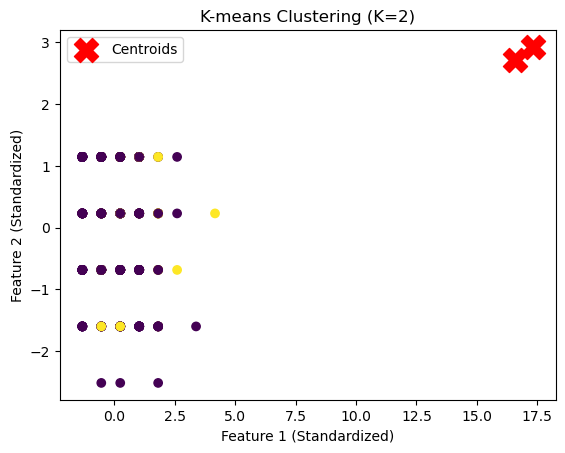

In [70]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')

# Scatter plot of centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')

plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.title('K-means Clustering (K=2)')
plt.legend()
plt.show()

# Thankyou !